**Содержание:**

1.Задание

2.Импорт библиотек и подключение google диска

***3. Прогнозирование акций Лукойл***
   
  3.1. Работа с таблицей

  3.2. График таблицы

  3.3. Загрузка данных

  3.4  Дополнительные функции визуализации результатов

  3.5. **Нейронная сеть с Dense слоем**

  - 3.5.1 Обучение lr=1e-4

  - 3.5.2 Уменьшение шага обучения lr=1e-5
       
      - График lr=1e-5

  - 3.5.3 Уменьшение шага обучения lr=1e-6

      - График lr=1e-6
      
  - 3.5.4. Прогноз данных, отображение на графике
      
  - 3.5.5. График корреляции

  - 3.5.6. График корреляции со смещением шага

  3.6. **Нейронная сеть с Dense (Первый слой Flatten)**

  - 3.6.1 Обучение lr=1e-4

  - 3.6.2 Уменьшение шага обучения lr=1e-5

      - График lr=1e-5

  - 3.6.3 Уменьшение шага обучения lr=1e-6

      - График lr=1e-6
      
  - 3.6.4. Прогноз данных, отображение на графике

  - 3.6.5. График корреляции

  - 3.6.6. График корреляции со смещением шага

  3.7. **Одномерная свертка Conv1D**

  - 3.7.1 Обучение lr=1e-4
       
      - График lr=1e-4

    - 3.7.2. Прогноз данных, отображение на графике (lr=1e-4)

    - 3.7.3. График корреляции (lr=1e-4)

    - 3.7.4. График корреляции со смещением шага (lr=1e-4)

    - 3.8.1 Уменьшение шага обучения lr=1e-5

        - График lr=1e-5
      
    - 3.8.2. Прогноз данных, отображение на графике (lr=1e-5)

    - 3.8.3. График корреляции (lr=1e-5)

    - 3.8.4. График корреляции со смещением шага (lr=1e-5)
      
  3.9. **LSTM сеть**

  - 3.9.1. Обучение сети lr=1e-5

      - График lr=1e-5
      
  - 3.9.2. Прогноз данных, отображение на графике (lr=1e-5)

  - 3.9.3. График корреляции (lr=1e-5)

  - 3.9.4. График корреляции со смещением шага (lr=1e-5)
  
***4. Предсказание тренда (акции Сбербанка)***

  4.1. Работа с таблицей

  4.2. Формирование y_train

  4.3. Деление на выборки (обучающую и проверочную)

  4.4. Нормирование данных

  4.5. Самописный TimeSeriesGenerator

  4.6. **Нейронная сеть**
  
  - 4.6.1. Обучение нейронной сети (lr=1e-5)

    - График lr=1e-5

  - 4.6.2. Распознавание всех текстовых вариантов и вывод класса


**5. Выводы**    


          

**1. Задание**

Задание Ultra Lite

Используя шаблон ноутбука, напишите загрузку данных и прогнозирование акций Лукойла на 1 шаг с помощью Dense и Conv1D сетей (две отдельные сети).

Можно подсматривать в исходный ноутбук с занятия, но желательно писать код своими руками.

# 2. Импорт библиотек и подключение google диска

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector, Input, concatenate
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#3. Прогнозирование акций Лукойл

## 3.1 Работа с таблицей

In [ ]:
# Считываем данные и присваеваем переменной с помощью pandas
# Загрузим данные за 16-17 и 18-19 годы
data16_17 = pd.read_csv('/content/drive/MyDrive/Временные ряды/База акции Лукойла/16_17.csv', sep=';')
data18_19 = pd.read_csv('/content/drive/MyDrive/Временные ряды/База акции Лукойла/18_19.csv', sep=';')

In [ ]:
# Посмотрим на таблицу с которой нужно работать (первые 5 строк)
data16_17.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,04.01.2016,10:00:00,2351.0,2355.8,2350.0,2350.0,2547
1,04.01.2016,10:01:00,2352.9,2355.7,2350.0,2355.7,195
2,04.01.2016,10:02:00,2355.6,2356.0,2351.4,2354.1,257
3,04.01.2016,10:03:00,2354.5,2355.0,2351.2,2353.7,763
4,04.01.2016,10:04:00,2353.1,2353.9,2353.1,2353.6,231


In [ ]:
# Убираем колонки DATE и TIME
data16_17 = data16_17.iloc[:,2:]
data18_19 = data18_19.iloc[:,2:]

In [ ]:
# Посмотрим на результат
data16_17.head()

,OPEN,MAX,MIN,CLOSE,VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547
1,2352.9,2355.7,2350.0,2355.7,195
2,2355.6,2356.0,2351.4,2354.1,257
3,2354.5,2355.0,2351.2,2353.7,763
4,2353.1,2353.9,2353.1,2353.6,231


In [ ]:
# Посмотрим размер
print(data16_17.shape[0])
print(data18_19.shape[0])


263925
217947


In [ ]:
# Объединяем две базы в одну
#data = data16_17.copy()
data = pd.concat([data16_17, data18_19])

# Переводим в numpy массив
data = np.array(data)

In [ ]:
# Проверим результат. Выведим размеры таблиц
print(len(data16_17))
print(len(data18_19))
print(len(data))         # Общая таблица 

263925
217947
481872


## 3.2 График таблицы

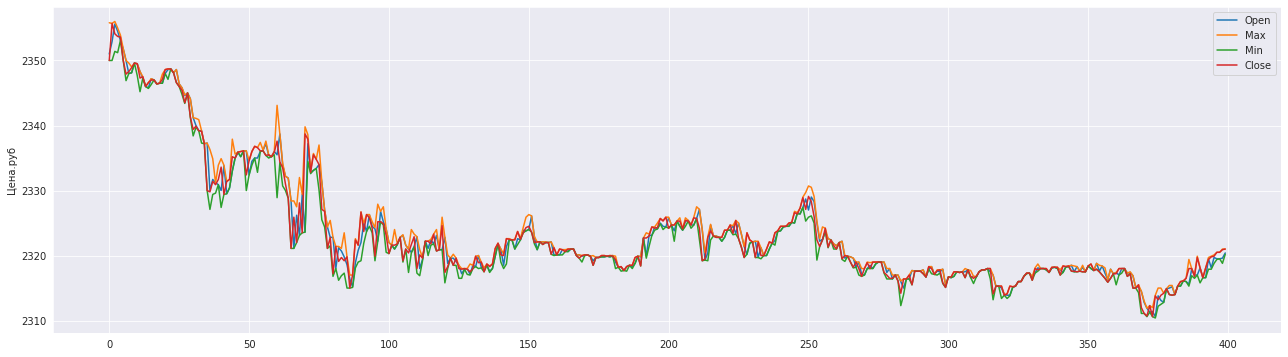

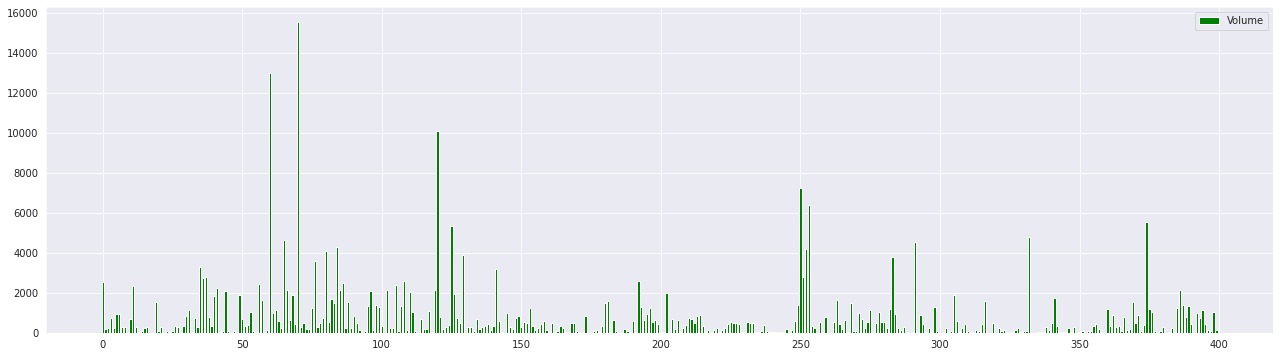

In [ ]:
# Отобразим исходные данные от точки которая будет задана в переменной start длинной заданной в переменной lenght
start = 0  
lenght = 400

# Названия каналов данных
chanelNames = ['Open', 'Max', 'Min', 'Close']

# Рисуем графики данных 
# Open, Max, Min, Close
plt.figure(figsize=(22,6))
for i in range(4):
  plt.plot(data[start:start+lenght,i], label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

# B отдельно график канала Volume
plt.figure(figsize=(22,6))
plt.bar(x=np.arange(lenght), height=data[start:start+lenght, 4], label='Volume', color ='g')
plt.legend()
plt.show()


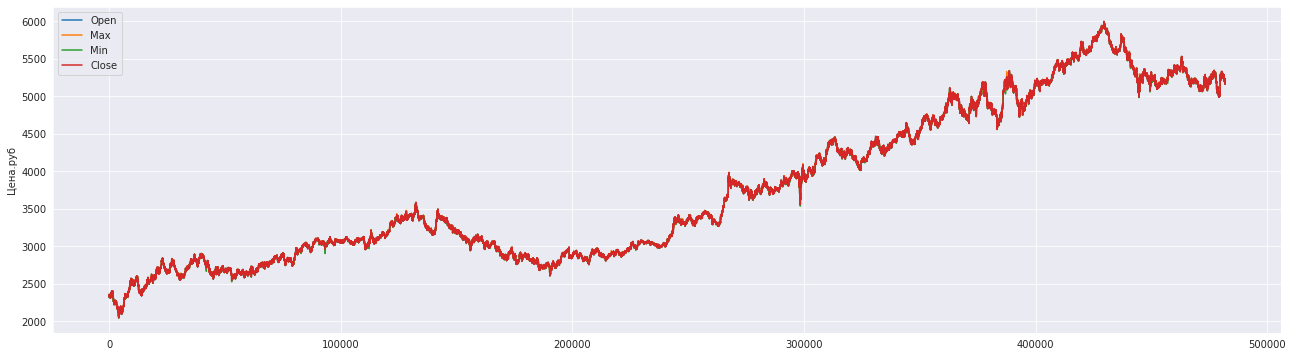

In [ ]:
# Отобразим данные с 2016 по 2019 года.
plt.figure(figsize=(22,6))
for i in range(4):
  plt.plot(data[:,i], label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

## 3.3. Загрузка данных

In [ ]:
xLen = 300                               # Анализ по xLen прошедшим точкам
valLen = 30000                           # Кол-во на проверочную выборку

trainLen = data.shape[0] - valLen        # Размер тренировочной выборки (зависит от значения valLen)

# Делим данные на выборки проверочную и тестовую

xTrain, xTest = data[:trainLen], data[trainLen + xLen + 2:]

# Нормализируем данные
xScaler = MinMaxScaler()
xScaler.fit(xTrain)

xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

print('xTrain:', xTrain.shape)
print('xTest:', xTest.shape)

# Делаем reshape на тестовых данных и нормализуем их

yTrain, yTest = np.reshape(data[:trainLen, 3],(-1,1)), np.reshape(data[trainLen+xLen+2:,3],(-1,1))

print('\nПосле reshape:')
print('yTrain:', yTrain.shape)
print('yTest:', yTest.shape)

yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

xTrain: (451872, 5)
xTest: (29698, 5)

После reshape:
yTrain: (451872, 1)
yTest: (29698, 1)


In [ ]:
# Создаем генератор для обучающей выборки
trainDataGen = TimeseriesGenerator(xTrain, yTrain, length= xLen, stride=1, sampling_rate=1, batch_size=20)

In [ ]:
# Аналогично для валидационной выборки
testDataGen = TimeseriesGenerator(xTest, yTest, length=xLen, stride=1 , batch_size=20, sampling_rate=1)

In [ ]:
# Посмотрим на размеры 
print(trainDataGen[0][0].shape)
print(testDataGen[0][1].shape)

(20, 300, 5)
(20, 1)


In [ ]:
# Сразу получим значения и переведем в numpy массив для проверки
DataGen = TimeseriesGenerator(xTest, yTest, length=300, sampling_rate=1, batch_size=len(xTest)) 

xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

In [ ]:
print(xVal.shape)
print(yVal.shape)

(1, 29398, 300, 5)
(1, 29398, 1)


## 3.4. Дополнительные функции визуализации результатов

In [ ]:
# Функция для рассчета результата прогнозирования сети
def getPred(currModel, xVal, yVal, yScaler):
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  return (predVal, yValUnscaled)                  # Возврат предсказанного результата и реальных данных

In [ ]:
# Функция визуализации графиков предсказания и реальных данных
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0], label = 'Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

In [ ]:
# Рассчет корреляции двух векторов
def correlate(a,b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb) / (sa*sb)
  return val

In [ ]:
# Функция отрисовки графика корреляции со смещением шага для проверки автокорреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  for ch in channels:
    corr = [] 
    yLen = yValUnscaled.shape[0] 

    # C помощью цикла изменяем шаг
    for i in range(corrSteps):
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = []  # Список для эталонного грфика автокорреляции, к которому нужно стремиться

    for i in range(corrSteps):
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')   # Для предсказанных значений
    plt.plot(own_corr, label='Эталон')                              # Для эталона

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

## 3.5. Нейронная сеть с Dense слоем

In [ ]:
modelD = Sequential()
modelD.add(Dense(150, input_shape = (xLen,5), activation='relu'))
modelD.add(Flatten())
modelD.add(Dense(1, activation='linear'))

modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

modelD.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300, 150)          900       
_________________________________________________________________
flatten (Flatten)            (None, 45000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 45001     
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### 3.5.1 lr=1e-4

In [ ]:
# Обучение
history = modelD.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22579/22579 [==============================] - 63s 3ms/step - loss: 8.3671e-04 - val_loss: 2.7347e-05
Epoch 2/30
22579/22579 [==============================] - 60s 3ms/step - loss: 8.2983e-05 - val_loss: 3.3949e-05
Epoch 3/30
22579/22579 [==============================] - 60s 3ms/step - loss: 4.1844e-05 - val_loss: 2.8757e-05
Epoch 4/30
22579/22579 [==============================] - 60s 3ms/step - loss: 3.1004e-05 - val_loss: 1.9762e-05
Epoch 5/30
22579/22579 [==============================] - 60s 3ms/step - loss: 2.6052e-05 - val_loss: 1.1145e-05
Epoch 6/30
22579/22579 [==============================] - 60s 3ms/step - loss: 2.3987e-05 - val_loss: 1.4651e-05
Epoch 7/30
22579/22579 [==============================] - 60s 3ms/step - loss: 2.0279e-05 - val_loss: 2.0481e-05
Epoch 8/30
22579/22579 [==============================] - 60s 3ms/step - loss: 1.6549e-05 - val_loss: 1.5291e-05
Epoch 9/30
22579/22579 [==============================] - 60s 3ms/step - loss: 1.6865e-05 - val_

### 3.5.2 Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
history = modelD.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


22579/22579 [==============================] - 61s 3ms/step - loss: 3.2099e-06 - val_loss: 4.7687e-06
Epoch 2/30
22579/22579 [==============================] - 61s 3ms/step - loss: 3.1654e-06 - val_loss: 2.6439e-05
Epoch 3/30
22579/22579 [==============================] - 61s 3ms/step - loss: 3.1523e-06 - val_loss: 4.5927e-06
Epoch 4/30
22579/22579 [==============================] - 61s 3ms/step - loss: 3.1272e-06 - val_loss: 4.7795e-06
Epoch 5/30
22579/22579 [==============================] - 62s 3ms/step - loss: 3.1150e-06 - val_loss: 4.6176e-06
Epoch 6/30
22579/22579 [==============================] - 62s 3ms/step - loss: 3.0955e-06 - val_loss: 5.1607e-06
Epoch 7/30
22579/22579 [==============================] - 62s 3ms/step - loss: 3.0876e-06 - val_loss: 1.3238e-05
Epoch 8/30
22579/22579 [==============================] - 61s 3ms/step - loss: 3.0389e-06 - val_loss: 5.2022e-06
Epoch 9/30
22579/22579 [==============================] - 61s 3ms/step - loss: 3.0431e-06 - val_loss: 7.656

#### График lr=1e-5

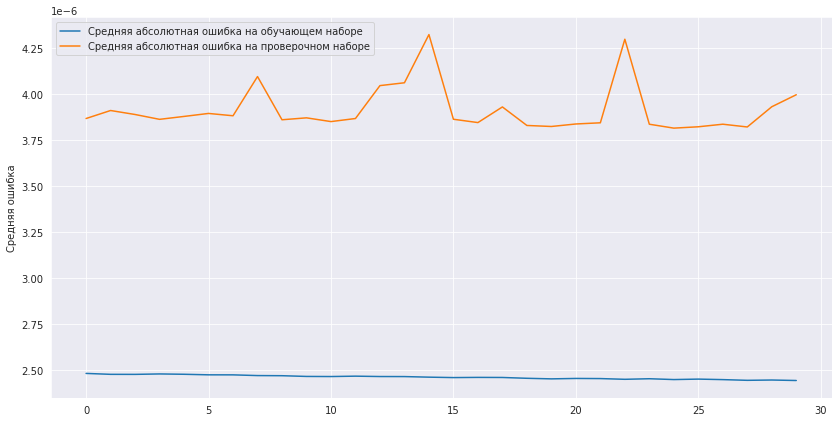

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.5.3 Уменьшаем шаг обучения lr=1e-6

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-6))
history = modelD.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
22579/22579 [==============================] - 61s 3ms/step - loss: 2.4836e-06 - val_loss: 3.8662e-06
Epoch 2/30
22579/22579 [==============================] - 61s 3ms/step - loss: 2.4786e-06 - val_loss: 3.9096e-06
Epoch 3/30
22579/22579 [==============================] - 61s 3ms/step - loss: 2.4784e-06 - val_loss: 3.8880e-06
Epoch 4/30
22579/22579 [==============================] - 61s 3ms/step - loss: 2.4807e-06 - val_loss: 3.8618e-06
Epoch 5/30
22579/22579 [==============================] - 61s 3ms/step - loss: 2.4790e-06 - val_loss: 3.8775e-06
Epoch 6/30
22579/22579 [==============================] - 62s 3ms/step - loss: 2.4759e-06 - val_loss: 3.8937e-06
Epoch 7/30
22579/22579 [==============================] - 63s 3ms/step - loss: 2.4758e-06 - val_loss: 3.8811e-06
Epoch 8/30
22579/22579 [==============================] - 64s 3ms/step - loss: 2.4719e-06 - val_loss: 4.0937e-06
Epoch 9/30
22579/22579 [==============================] - 63s 3ms/step - loss: 2.4712e-06 - val_

#### График lr=1e-6

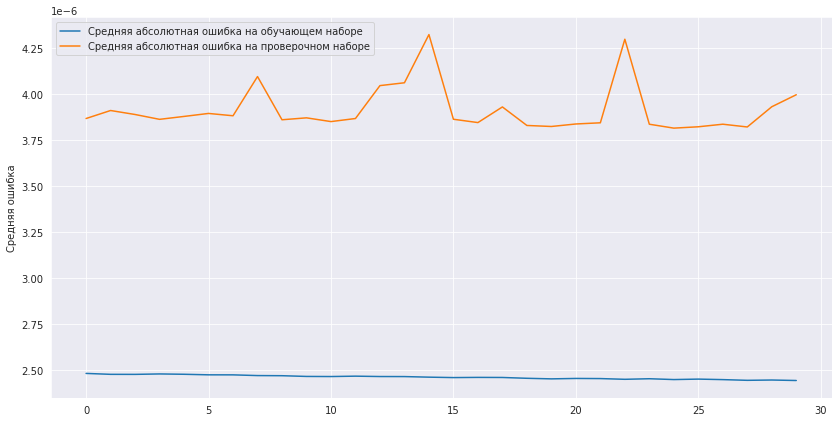

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.5.4. Прогноз данных, отображение на графике

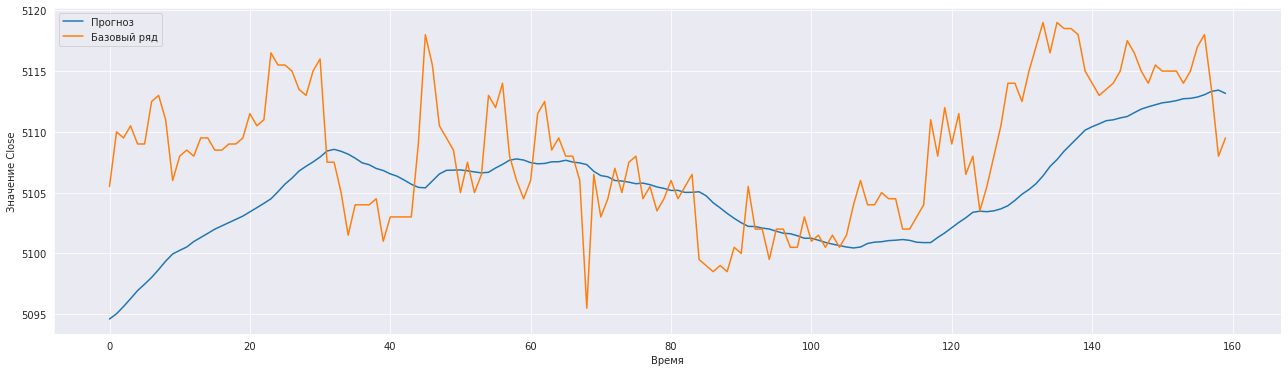

In [ ]:
(predVal_D, yValUnscaled_D) = getPred(modelD, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0, 160, 0, predVal_D, yValUnscaled_D)

### 3.5.5. График корреляции

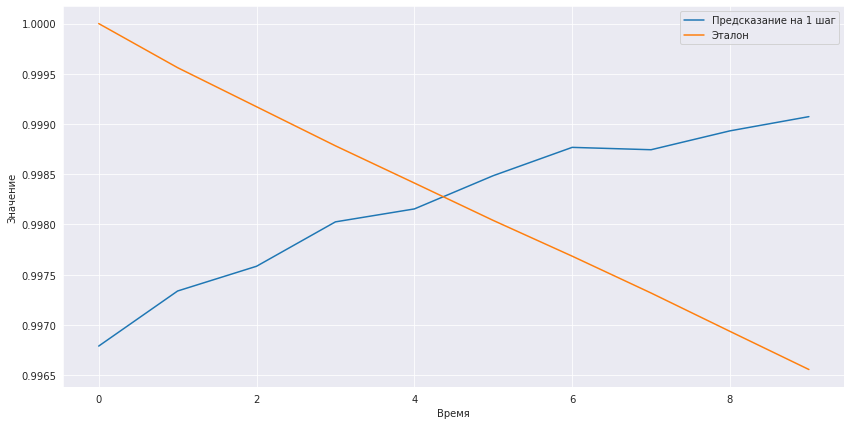

In [ ]:
showCorr([0], 10, predVal_D, yValUnscaled_D)

### 3.5.6. График корреляции со смещением шага

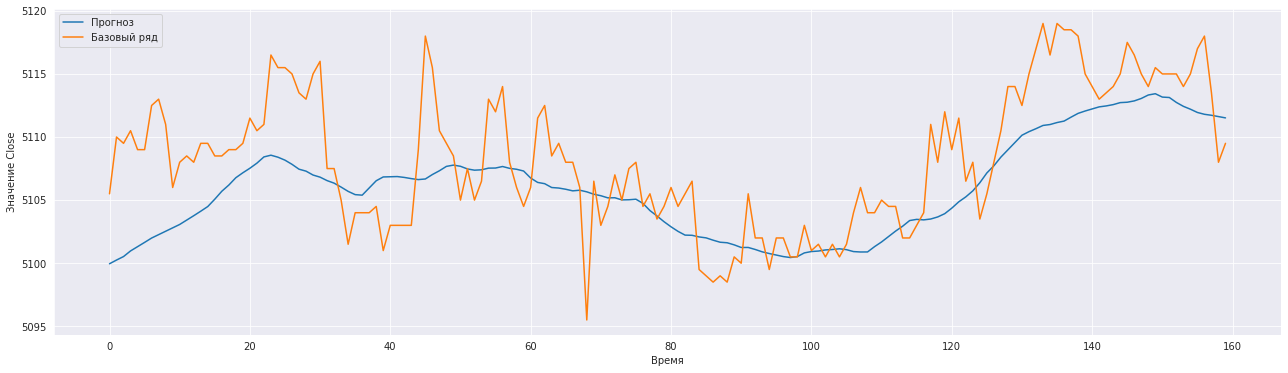

In [ ]:
showPredict(0,160,0, predVal_D[9:], yValUnscaled_D[:-9])

## 3.6. Нейронная сеть с Dense (Первый слой Flatten)

In [ ]:
modelD_F = Sequential()
modelD_F.add(Flatten(input_shape = (xLen,5)))
modelD_F.add(Dense(100, activation='relu'))
modelD_F.add(Dense(1, activation='linear'))

modelD_F.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

modelD_F.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               150100    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 150,201
Trainable params: 150,201
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### 3.6.1 Шаг обучения lr=1e-4

In [ ]:
# Обучение
history = modelD_F.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22579/22579 [==============================] - 53s 2ms/step - loss: 0.0017 - val_loss: 1.1947e-04
Epoch 2/30
22579/22579 [==============================] - 52s 2ms/step - loss: 3.1847e-04 - val_loss: 1.3462e-05
Epoch 3/30
22579/22579 [==============================] - 52s 2ms/step - loss: 1.0964e-04 - val_loss: 4.0799e-05
Epoch 4/30
22579/22579 [==============================] - 52s 2ms/step - loss: 7.6707e-05 - val_loss: 3.6360e-04
Epoch 5/30
22579/22579 [==============================] - 52s 2ms/step - loss: 5.7845e-05 - val_loss: 1.5678e-05
Epoch 6/30
22579/22579 [==============================] - 53s 2ms/step - loss: 4.5695e-05 - val_loss: 1.0022e-05
Epoch 7/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.3722e-05 - val_loss: 1.2942e-05
Epoch 8/30
22579/22579 [==============================] - 53s 2ms/step - loss: 2.8820e-05 - val_loss: 0.0023
Epoch 9/30
22579/22579 [==============================] - 53s 2ms/step - loss: 2.6634e-05 - val_loss: 4.

### 3.6.2 Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD_F.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
history = modelD_F.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
22579/22579 [==============================] - 52s 2ms/step - loss: 4.0506e-06 - val_loss: 6.0440e-06
Epoch 2/30
22579/22579 [==============================] - 52s 2ms/step - loss: 4.0073e-06 - val_loss: 6.7890e-06
Epoch 3/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.9896e-06 - val_loss: 6.2000e-06
Epoch 4/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.9560e-06 - val_loss: 8.8854e-06
Epoch 5/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.9427e-06 - val_loss: 6.5066e-06
Epoch 6/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.8716e-06 - val_loss: 6.1087e-06
Epoch 7/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.8599e-06 - val_loss: 5.5873e-06
Epoch 8/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.8598e-06 - val_loss: 5.6164e-06
Epoch 9/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.8304e-06 - val_

#### График lr=1e-5

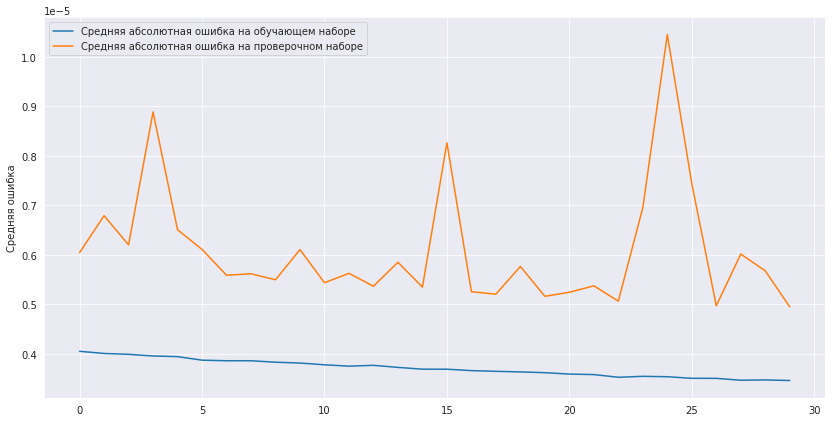

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.6.3 Уменьшаем шаг обучения lr=1e-6

In [ ]:
modelD_F.compile(loss='mse', optimizer=Adam(learning_rate=1e-6))
history = modelD_F.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1248e-06 - val_loss: 4.9200e-06
Epoch 2/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1221e-06 - val_loss: 4.9559e-06
Epoch 3/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1242e-06 - val_loss: 5.0818e-06
Epoch 4/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1163e-06 - val_loss: 4.9467e-06
Epoch 5/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1236e-06 - val_loss: 4.8676e-06
Epoch 6/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1164e-06 - val_loss: 4.9442e-06
Epoch 7/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1180e-06 - val_loss: 5.2524e-06
Epoch 8/30
22579/22579 [==============================] - 53s 2ms/step - loss: 3.1124e-06 - val_loss: 4.9153e-06
Epoch 9/30
22579/22579 [==============================] - 52s 2ms/step - loss: 3.1172e-06 - val_

#### График lr=1e-6

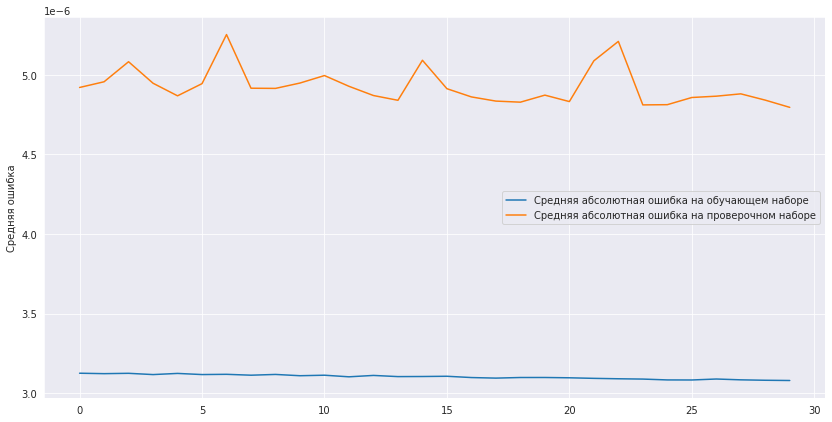

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.6.4. Прогноз данных, отображение на графике

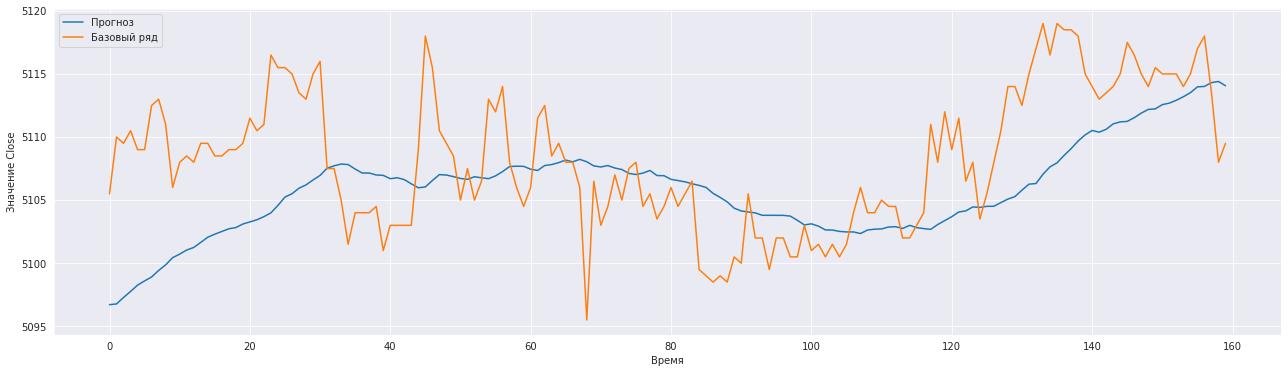

In [ ]:
(predVal_D_F, yValUnscaled_D_F) = getPred(modelD_F, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_D_F, yValUnscaled_D_F)


### 3.6.5. График корреляции

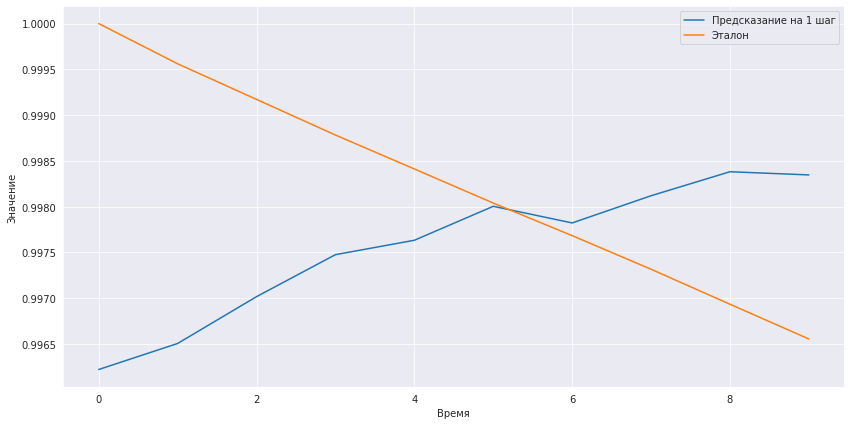

In [ ]:
showCorr([0], 10, predVal_D_F, yValUnscaled_D_F)

### 3.6.6. График корреляции со смещением шага

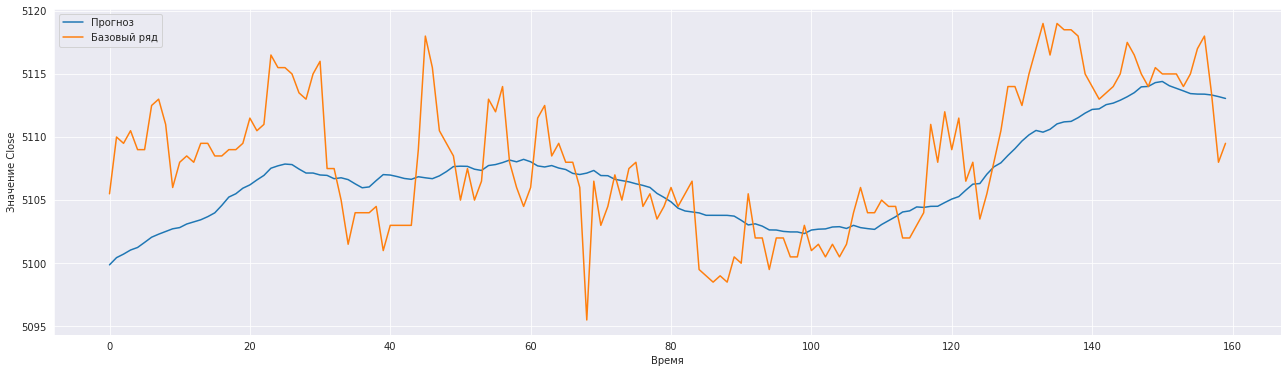

In [ ]:
showPredict(0,160,0, predVal_D_F[8:], yValUnscaled_D_F[:-8])

## 3.7. Одномерная свертка Conv1D

In [ ]:
modelC = Sequential()
modelC.add(Conv1D(64,5, input_shape=(xLen,5), activation='relu'))
modelC.add(Conv1D(64,5, activation='relu'))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(150, activation='relu'))
modelC.add(Dense(1, activation='linear'))

modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

In [ ]:
modelC.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 296, 64)           1664      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 292, 64)           20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 146, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9344)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               1401750   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 1,424,109
Trainable params: 1,424,109
Non-trainable params: 0
____________________________________________

### 3.7.1 Шаг обучения lr=1e-4

In [ ]:
# Обучение
history = modelC.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22579/22579 [==============================] - 127s 4ms/step - loss: 3.5863e-04 - val_loss: 0.0017
Epoch 2/30
22579/22579 [==============================] - 95s 4ms/step - loss: 8.1651e-05 - val_loss: 2.3090e-04
Epoch 3/30
22579/22579 [==============================] - 95s 4ms/step - loss: 5.6625e-05 - val_loss: 4.7734e-05
Epoch 4/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.3155e-05 - val_loss: 1.2432e-04
Epoch 5/30
22579/22579 [==============================] - 95s 4ms/step - loss: 3.8939e-05 - val_loss: 5.9195e-05
Epoch 6/30
22579/22579 [==============================] - 94s 4ms/step - loss: 3.4938e-05 - val_loss: 1.3117e-05
Epoch 7/30
22579/22579 [==============================] - 94s 4ms/step - loss: 3.3817e-05 - val_loss: 9.0495e-05
Epoch 8/30
22579/22579 [==============================] - 94s 4ms/step - loss: 2.9326e-05 - val_loss: 2.0409e-05
Epoch 9/30
22579/22579 [==============================] - 94s 4ms/step - loss: 2.9348e-05 - val_los

#### График lr=1e-4

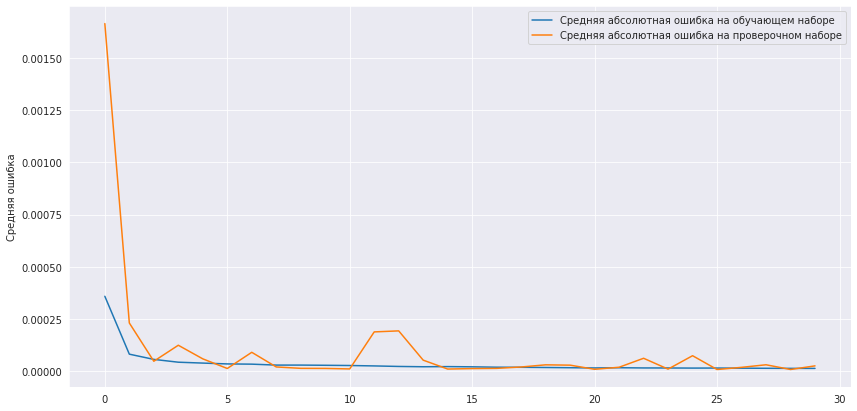

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.7.2. Прогноз данных, отображение на графике (lr=1e-4)

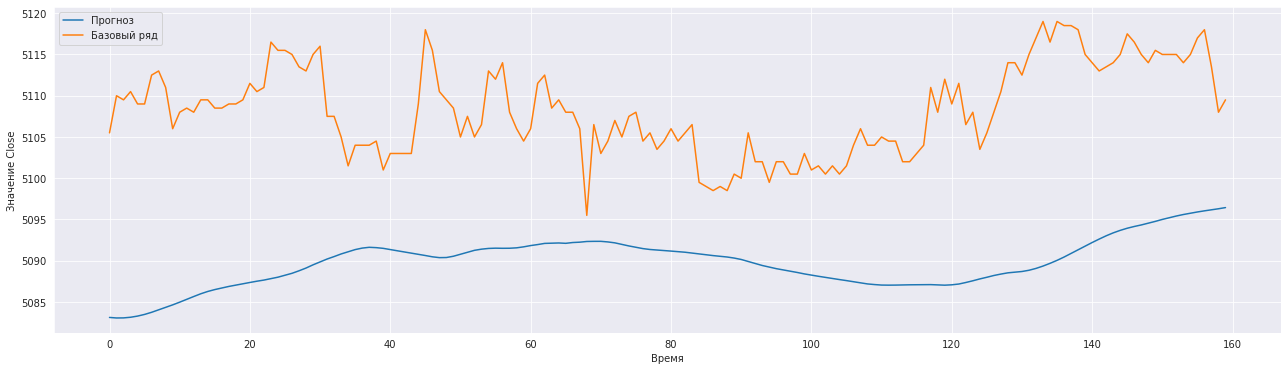

In [ ]:
(predVal_C, yValUnscaled_C) = getPred(modelC, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_C, yValUnscaled_C)


### 3.7.3. График корреляции (lr=1e-4)

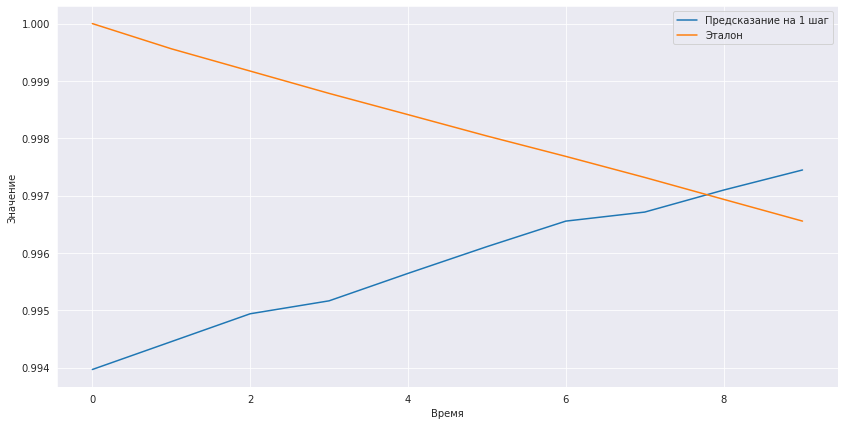

In [ ]:
showCorr([0], 10, predVal_C, yValUnscaled_C)

### 3.7.4. График корреляции со смещением шага (lr=1e-4)

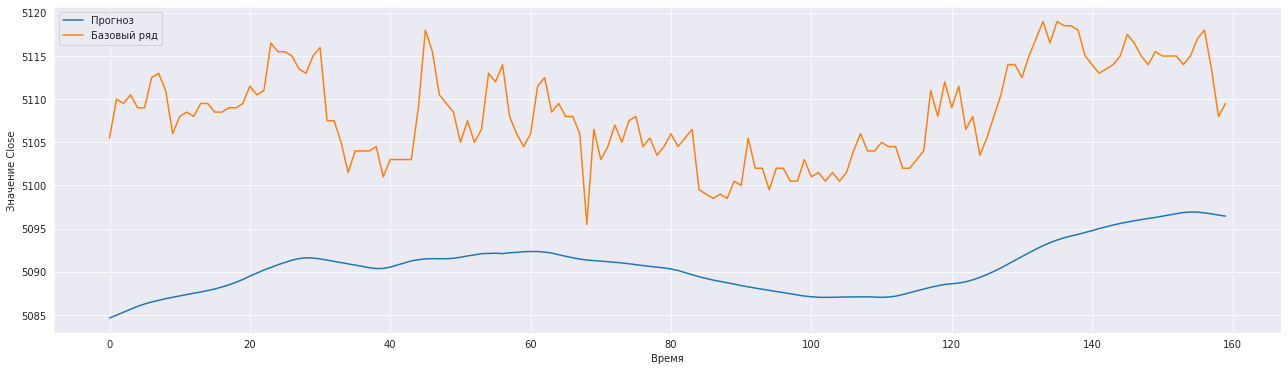

In [ ]:
showPredict(0,160,0, predVal_C[9:], yValUnscaled_C[:-9])

### 3.8.1 Меняем шаг обучения lr=1e-5

In [ ]:
modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
history = modelC.fit(trainDataGen, epochs=30, verbose=1, validation_data=testDataGen)

Epoch 1/30
22579/22579 [==============================] - 96s 4ms/step - loss: 4.6288e-06 - val_loss: 9.2847e-06
Epoch 2/30
22579/22579 [==============================] - 96s 4ms/step - loss: 4.5724e-06 - val_loss: 7.9220e-06
Epoch 3/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.5580e-06 - val_loss: 8.2348e-06
Epoch 4/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.5558e-06 - val_loss: 7.1637e-06
Epoch 5/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.4735e-06 - val_loss: 1.2022e-05
Epoch 6/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.4795e-06 - val_loss: 7.0993e-06
Epoch 7/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.4432e-06 - val_loss: 7.5860e-06
Epoch 8/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.3968e-06 - val_loss: 9.0386e-06
Epoch 9/30
22579/22579 [==============================] - 94s 4ms/step - loss: 4.3818e-06 - val_

#### График lr=1e-5

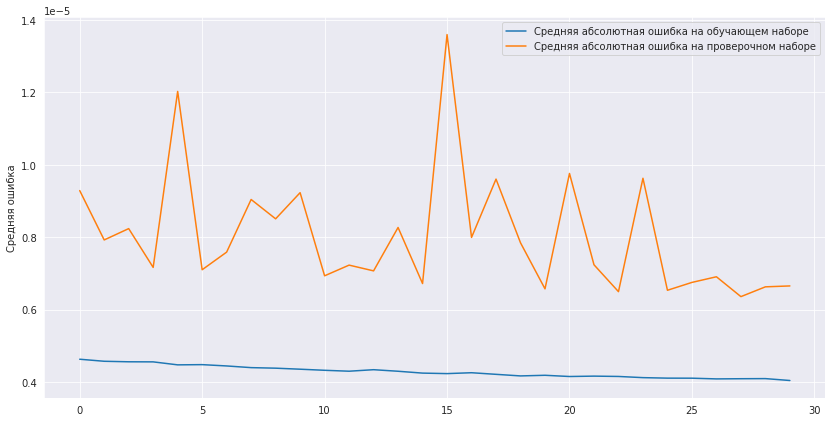

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.8.2. Прогноз данных, отображение на графике (lr=1e-5)

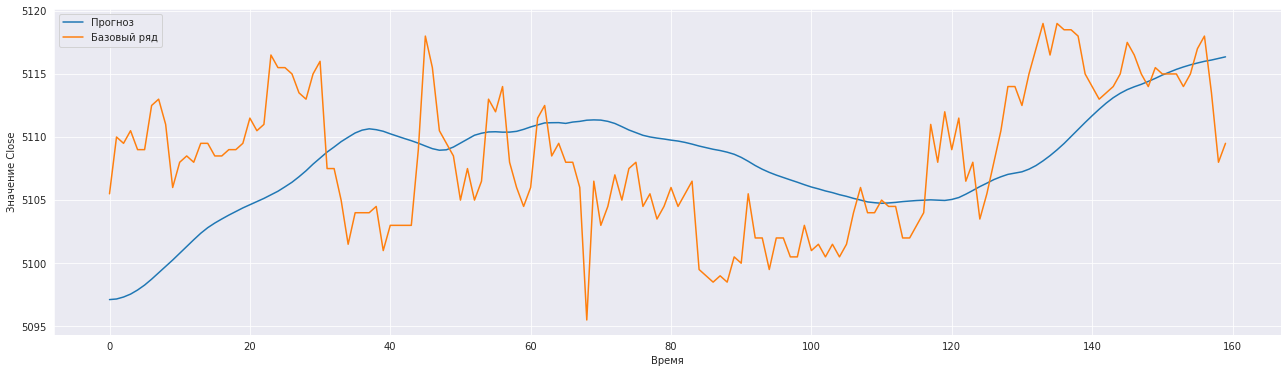

In [ ]:
(predVal_C, yValUnscaled_C) = getPred(modelC, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_C, yValUnscaled_C)


### 3.8.3. График корреляции (lr=1e-5)

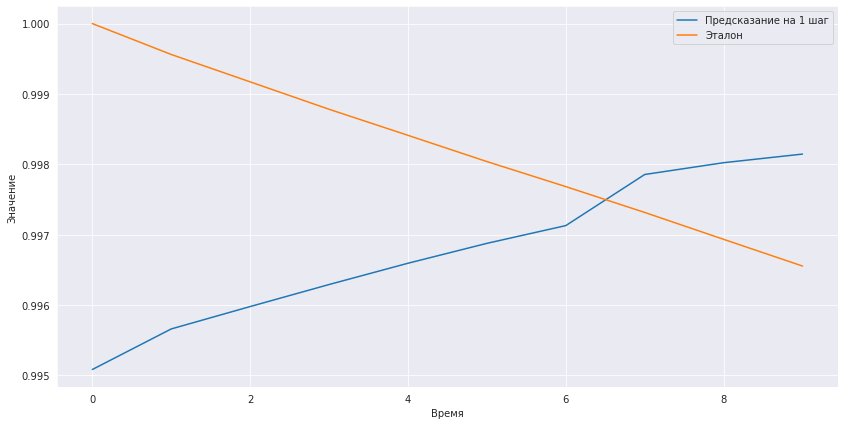

In [ ]:
showCorr([0], 10, predVal_C, yValUnscaled_C)

### 3.8.4. График корреляции со смещением шага (lr=1e-5)

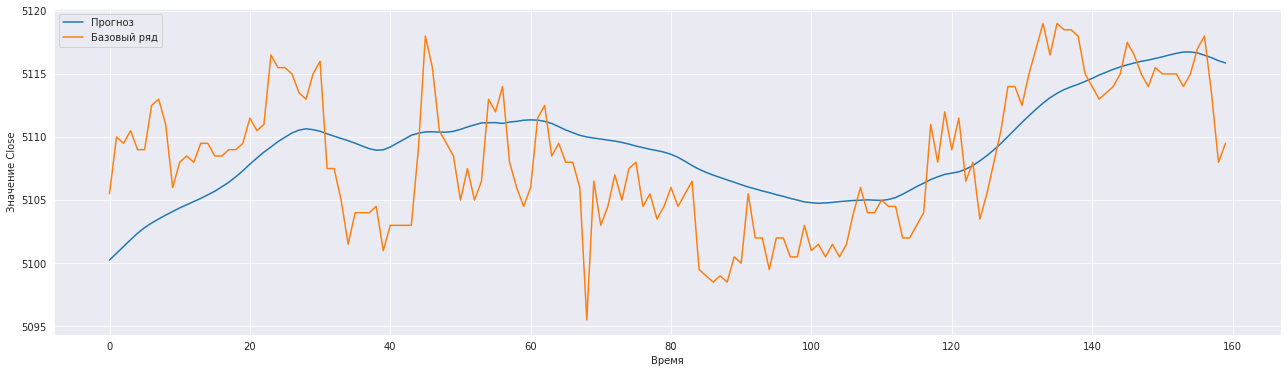

In [ ]:
showPredict(0,160,0, predVal_C[9:], yValUnscaled_C[:-9])

## 3.9. LSTM сеть

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(5, input_shape=(xLen,5)))
model_LSTM.add(Dense(10, activation='relu'))
model_LSTM.add(Dense(1,activation='linear'))

model_LSTM.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))

In [ ]:
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 220       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


3.9.1. Обучение сети (шаг обучения lr=1e-5)

In [ ]:
history_LSTM = model_LSTM.fit(trainDataGen, epochs=20, verbose=1, validation_data=testDataGen )

Epoch 1/20
22579/22579 [==============================] - 230s 10ms/step - loss: 0.1087 - val_loss: 0.0223
Epoch 2/20
22579/22579 [==============================] - 228s 10ms/step - loss: 0.0016 - val_loss: 2.8645e-05
Epoch 3/20
22579/22579 [==============================] - 229s 10ms/step - loss: 2.1893e-05 - val_loss: 5.4514e-06
Epoch 4/20
22579/22579 [==============================] - 228s 10ms/step - loss: 7.4934e-06 - val_loss: 7.1818e-06
Epoch 5/20
22579/22579 [==============================] - 228s 10ms/step - loss: 4.9961e-06 - val_loss: 7.2213e-06
Epoch 6/20
22579/22579 [==============================] - 228s 10ms/step - loss: 4.4978e-06 - val_loss: 5.9902e-06
Epoch 7/20
22579/22579 [==============================] - 230s 10ms/step - loss: 4.1718e-06 - val_loss: 8.9391e-06
Epoch 8/20
22579/22579 [==============================] - 237s 11ms/step - loss: 3.8328e-06 - val_loss: 5.7716e-06
Epoch 9/20
22579/22579 [==============================] - 237s 10ms/step - loss: 3.5358e-06 

#### График lr=1e-5

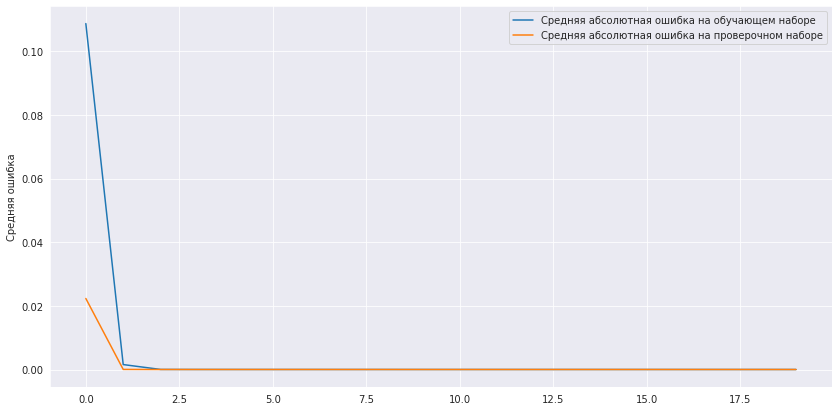

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### 3.9.2. Прогноз данных, отображение на графике (lr=1e-5)

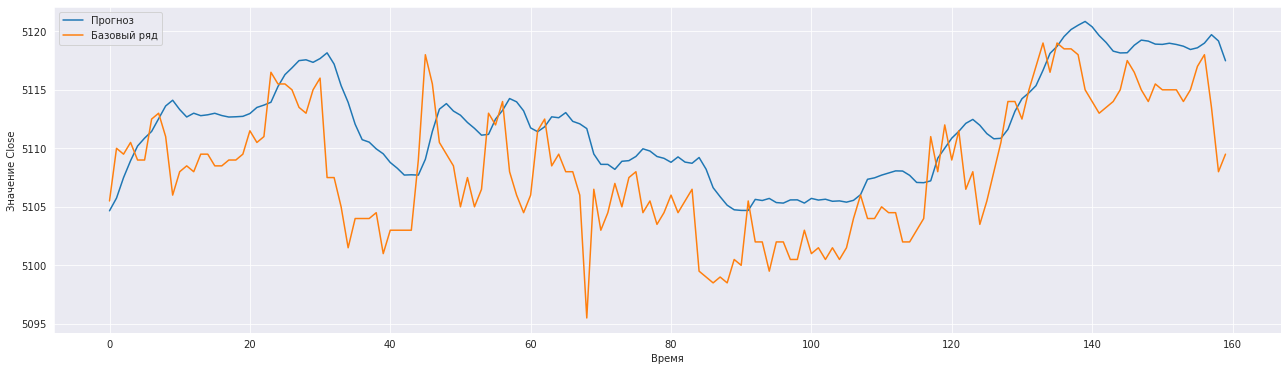

In [ ]:
(predVal_LSTM, yValUnscaled_LSTM) = getPred(model_LSTM, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0,160,0, predVal_LSTM, yValUnscaled_LSTM)


### 3.9.3. График корреляции (lr=1e-5)

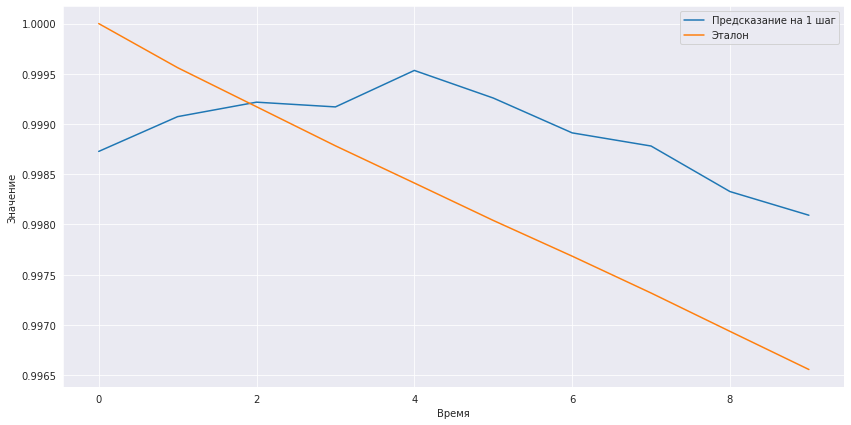

In [ ]:
showCorr([0], 10, predVal_LSTM, yValUnscaled_LSTM)

### 3.9.4. График корреляции со смещением шага (lr=1e-5)

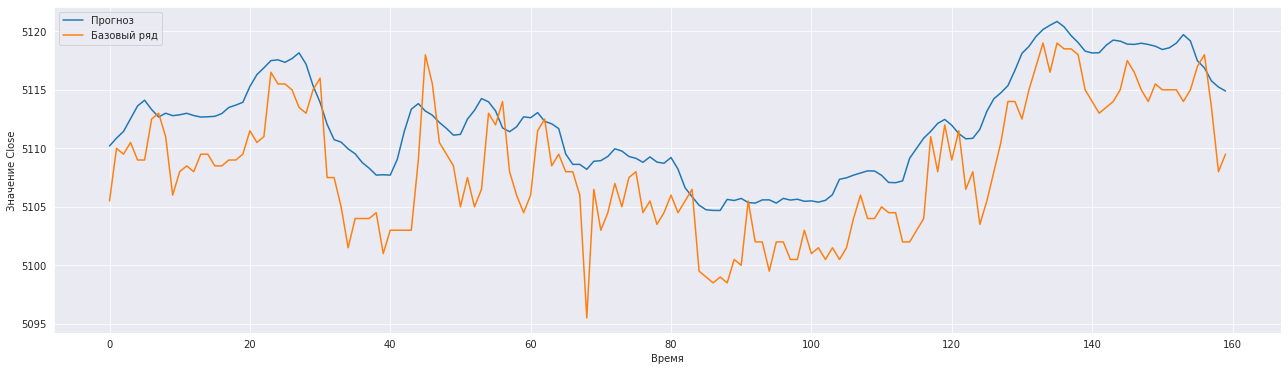

In [ ]:
showPredict(0,160,0, predVal_LSTM[4:], yValUnscaled_LSTM[:-4])

# 4. Предсказание тренда (акции Сбербанка)

## 4.1. Работа с таблицей

In [ ]:
# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/Временные ряды/База акций Сбербанка/SBER_MIN60.txt', sep='\t', header=None)
data.columns=['Data', 'Open', 'High', 'Low', 'Close']

# Используем маску, чтобы согкратить данные
mask = (data['Data'] >= '2010-09-01 10:00:00.000') & (data['Data'] <= '2018-12-31 23:59:00.000')
data = data[mask]

In [ ]:
# Посмотрим результат
data.head()

,Data,Open,High,Low,Close
22047,2010-09-01 10:00:00.000,78.55,78.67,77.94,78.04
22048,2010-09-01 11:00:00.000,78.04,78.10,77.60,78.00
22049,2010-09-01 12:00:00.000,78.00,78.88,77.98,78.88
22050,2010-09-01 13:00:00.000,78.89,79.19,78.80,78.85
22051,2010-09-01 14:00:00.000,78.85,78.99,78.61,78.86


In [ ]:
# Оставляем дату и цену закрытия для дальнейшего добавления
data = data.drop(data.columns[[0,1,2,3]], axis='columns')

In [ ]:
data.head()

,Close
22047,78.04
22048,78.00
22049,78.88
22050,78.85
22051,78.86


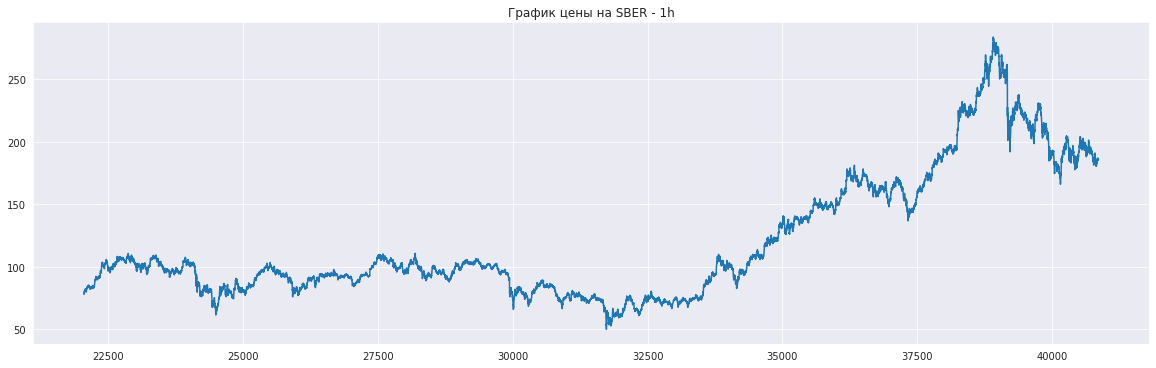

In [ ]:
# Постороим график цены
plt.figure(figsize=(20,8))
ax = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
data['Close'].plot(ax=ax)
plt.title('График цены на SBER - 1h')
plt.show()

In [ ]:
step_in_the_last = 15         # Шагов в прошлое
n_steps = 20                  # Серия дней
forvard_lag = 1               # Предсказание бара
analyze_period = 30000        # Сколько баров в прошлое


In [ ]:
# Подсчитаем относительную доходность
for i in range(1, step_in_the_last + 1):
  indicator_name = f'Close_chng_{i}'
  data[indicator_name] = data['Close'].pct_change(i)

In [ ]:
# Посмотрим на результат 
print(data.shape)

data.head()

(18818, 16)


,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6,Close_chng_7,Close_chng_8,Close_chng_9,Close_chng_10,Close_chng_11,Close_chng_12,Close_chng_13,Close_chng_14,Close_chng_15
22047,78.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22048,78.00,-0.000513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22049,78.88,0.011282,0.010764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22050,78.85,-0.000380,0.010897,0.010379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22051,78.86,0.000127,-0.000254,0.011026,0.010507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Удаляем строки с NaN
data = data.dropna()
data.head()

,Close,Close_chng_1,Close_chng_2,Close_chng_3,Close_chng_4,Close_chng_5,Close_chng_6,Close_chng_7,Close_chng_8,Close_chng_9,Close_chng_10,Close_chng_11,Close_chng_12,Close_chng_13,Close_chng_14,Close_chng_15
22062,80.83,0.005348,-0.000247,-0.005047,0.002480,0.008107,0.006475,0.005098,0.024721,0.022000,0.024332,0.024981,0.025111,0.024721,0.036282,0.035751
22063,80.85,0.000247,0.005597,0.000000,-0.004801,0.002729,0.008356,0.006724,0.005347,0.024975,0.022253,0.024585,0.025235,0.025365,0.024975,0.036538
22064,80.63,-0.002721,-0.002474,0.002861,-0.002721,-0.007509,0.000000,0.005612,0.003985,0.002611,0.022186,0.019471,0.021797,0.022445,0.022575,0.022186
22065,80.77,0.001736,-0.000989,-0.000742,0.004602,-0.000989,-0.005785,0.001736,0.007358,0.005728,0.004352,0.023960,0.021242,0.023571,0.024220,0.024350
22066,80.74,-0.000371,0.001364,-0.001361,-0.001113,0.004229,-0.001361,-0.006155,0.001364,0.006984,0.005354,0.003979,0.023580,0.020862,0.023191,0.023840


In [ ]:
# Разметра направления тренда
for i in range(1, step_in_the_last + 1):
  indicator_name = f'Close_chng_{i}'
  indicator_name_new = f'Y_{i}'
  data[indicator_name_new] = 0
  data.loc[data[indicator_name] > 0 , indicator_name_new] = 1

for i in range(1, step_in_the_last + 1):
  indicator_name = f'Close_chng_{i}'
  del data[indicator_name]


In [ ]:
data.head()

,Close,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10,Y_11,Y_12,Y_13,Y_14,Y_15
22062,80.83,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
22063,80.85,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
22064,80.63,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1
22065,80.77,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1
22066,80.74,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1


## 4.2. Формирование y_train

In [ ]:
indicator_name = f'Y_{step_in_the_last}'
data_Y = data[indicator_name]

In [ ]:
# Посмотрим результат
data_Y

22062    1
22063    1
22064    1
22065    1
22066    1
        ..
40860    1
40861    1
40862    1
40863    0
40864    0
Name: Y_15, Length: 18803, dtype: int64

In [ ]:
# Переводим в OHE
categorical_labels = to_categorical(data_Y, num_classes=2)

In [ ]:
# Посмотрим результат
print(len(categorical_labels))
categorical_labels[:5]

18803


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## 4.3. Деление на выборки (обучающую и проверочную)

In [ ]:
data = data.values

In [ ]:
print(data.shape, type(data))
data[:5]

(18803, 16) <class 'numpy.ndarray'>


array([[80.83,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [80.85,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [80.63,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [80.77,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [80.74,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ]])

In [ ]:
# xTest последние 600 значений
n_train = 600
xTrain = data[:-n_train-n_steps]
xTest = data[-n_train:]
yTrain = categorical_labels[:-n_train-n_steps]
yTest = categorical_labels[-n_train:]

print('xTrain: ', xTrain.shape)
print('xTest: ', xTest.shape)

print('yTrain: ', yTrain.shape)
print('yTest: ', yTest.shape)

xTrain:  (18183, 16)
xTest:  (600, 16)
yTrain:  (18183, 2)
yTest:  (600, 2)


## 4.4. Нормирование данных

In [ ]:
# Только обучающую выборку
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

print('xTrain: ', xTrain.shape)
print('xTest: ', xTest.shape)

xTest[:1]

xTrain:  (18183, 16)
xTest:  (600, 16)


array([[1.67212694, 1.00236765, 0.99260284, 0.9952267 , 0.99063942,
        0.98412208, 0.98206695, 0.9768934 , 0.97732353, 0.97710845,
        0.97775385, 0.97915361, 0.97442365, 0.97142498, 0.97292322,
        0.97420917]])

## 4.5. Самописный TimeSeriesGenerator

In [ ]:
# Функция для разделения массива на выборки
def split_sequence(sequence, Y, n_steps, forvard_lag):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps                                 # Конечный индекс строки
    if end_ix + (forvard_lag-1) > len(sequence)-1:       # Чтобы не выйти за пределы массива
      break
    seq_x, seq_y = sequence[i:end_ix], Y[end_ix + (forvard_lag-1)]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
# Обучающая выборка
for i in [forvard_lag]:
  xTrain, yTrain = split_sequence(xTrain, yTrain, n_steps, forvard_lag=i)

print(xTrain.shape)
print(yTrain.shape)

(18163, 20, 16)
(18163, 2)


In [ ]:
# Тестовая выборка
for i in [forvard_lag]:
  xTest, yTest = split_sequence(xTest, yTest, n_steps, forvard_lag=i)

print(xTest.shape)
print(yTest.shape)

(580, 20, 16)
(580, 2)


# 4.6. Нейронная сеть 

In [ ]:
input = Input(shape=(xTrain.shape[1], xTrain.shape[2]))
x = Flatten()(input)
x = RepeatVector(4)(x)
x = Conv1D(n_steps*2, 5, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = RepeatVector(4)(x)
x = Conv1D(n_steps, 5, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(n_steps*100, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(yTrain.shape[1], activation='sigmoid')(x)
model = Model(input,x)

model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

## 4.6.1. Обучение нейроннорй сети (lr=1e-5)

In [ ]:
history = model.fit(xTrain, yTrain, epochs=20, verbose=1, validation_data=(xTrain,yTrain))

Epoch 1/20
568/568 [==============================] - 35s 6ms/step - loss: 0.4718 - accuracy: 0.8054 - val_loss: 0.2831 - val_accuracy: 0.8830
Epoch 2/20
568/568 [==============================] - 3s 5ms/step - loss: 0.2557 - accuracy: 0.8961 - val_loss: 0.2321 - val_accuracy: 0.9072
Epoch 3/20
568/568 [==============================] - 3s 5ms/step - loss: 0.2244 - accuracy: 0.9119 - val_loss: 0.2128 - val_accuracy: 0.9168
Epoch 4/20
568/568 [==============================] - 3s 5ms/step - loss: 0.2103 - accuracy: 0.9187 - val_loss: 0.2032 - val_accuracy: 0.9201
Epoch 5/20
568/568 [==============================] - 3s 6ms/step - loss: 0.2030 - accuracy: 0.9214 - val_loss: 0.1973 - val_accuracy: 0.9234
Epoch 6/20
568/568 [==============================] - 3s 5ms/step - loss: 0.1979 - accuracy: 0.9233 - val_loss: 0.1930 - val_accuracy: 0.9255
Epoch 7/20
568/568 [==============================] - 3s 5ms/step - loss: 0.1944 - accuracy: 0.9261 - val_loss: 0.1898 - val_accuracy: 0.9277
Epoch

## График lr=1e-5

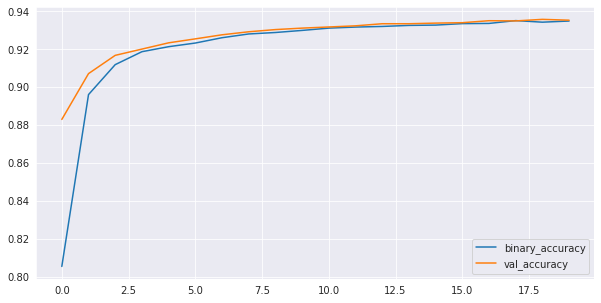

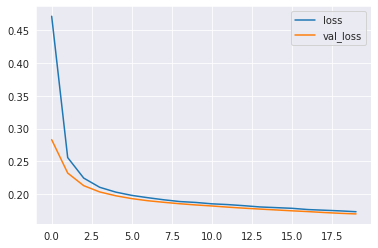

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='binary_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 4.6.2. Распознавание всех текстовых вариантов и вывод класса

In [ ]:
x_test = xTest[-200:]
y_test_org = yTest[-200:]
true_answer = 0
for i in range(len(x_test)):
  x = x_test[i]
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)

  if prediction == np.argmax(y_test_org[i]):
    true_answer +=1
  
  print('Index', i, '\nPrediction: ', prediction, '\tReal:', np.argmax(y_test_org[i]), '=>', y_test_org[i])

Index 0 
Prediction:  1 	Real: 1 => [0. 1.]
Index 1 
Prediction:  1 	Real: 1 => [0. 1.]
Index 2 
Prediction:  1 	Real: 1 => [0. 1.]
Index 3 
Prediction:  1 	Real: 1 => [0. 1.]
Index 4 
Prediction:  1 	Real: 0 => [1. 0.]
Index 5 
Prediction:  1 	Real: 1 => [0. 1.]
Index 6 
Prediction:  1 	Real: 1 => [0. 1.]
Index 7 
Prediction:  1 	Real: 1 => [0. 1.]
Index 8 
Prediction:  1 	Real: 1 => [0. 1.]
Index 9 
Prediction:  0 	Real: 0 => [1. 0.]
Index 10 
Prediction:  0 	Real: 1 => [0. 1.]
Index 11 
Prediction:  1 	Real: 1 => [0. 1.]
Index 12 
Prediction:  1 	Real: 1 => [0. 1.]
Index 13 
Prediction:  1 	Real: 1 => [0. 1.]
Index 14 
Prediction:  1 	Real: 1 => [0. 1.]
Index 15 
Prediction:  1 	Real: 1 => [0. 1.]
Index 16 
Prediction:  1 	Real: 1 => [0. 1.]
Index 17 
Prediction:  1 	Real: 1 => [0. 1.]
Index 18 
Prediction:  1 	Real: 1 => [0. 1.]
Index 19 
Prediction:  1 	Real: 1 => [0. 1.]
Index 20 
Prediction:  1 	Real: 1 => [0. 1.]
Index 21 
Prediction:  1 	Real: 1 => [0. 1.]
Index 22 
Prediction

In [ ]:
print('Правильных ответов: ', true_answer)
print('Ошибочных ответов: ', 200 - true_answer)
print('Процент правильных ответов: ', (true_answer/200)*100)

Правильных ответов:  182
Ошибочных ответов:  18
Процент правильных ответов:  91.0


# 5. Выводы:

1. Весь ноутбук переписывался в ручную что является хорошей практикой

2. По мимо задачи прогнозирование акций Лукойла было выполнено задание Предсказание тренда (акции Сбербанка)

3. Обучение по временным рядам происходит не быстро. Из-за большой обучающей выборки.

4. Из-за долгого обучения сети трудно подбирать архитектуру и гиперпараметры.

5. Нормализация данных существенно улучшает результат работы нейронной сети.

6. В подписях графиков (label) было Средняя абсолютная ошибка, в работе сети применяется mse, это Средняя квадратическая ошибка. Исправил в выводе графиков.

7. При выводе графиков в ноутбуке урока (у меня это пункт 3.2) в списке перчисляются каналы chanelNames = ['Open', 'Max', 'Min', 'Close', **'Volume'**], но последний канал Volume не выводится, так как цикл for идет до 3 (range(4). И в целом на данном графике канал Volume выводить не нужно, так как он естиь ниже, и у него на порядок другие цифры. И если его выводить на графике с остапльными данными, то будет не информативно.  